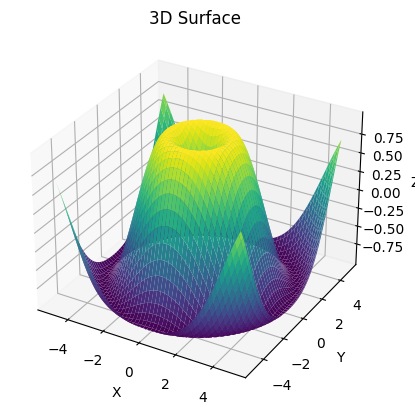

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate the coordinates
x = np.linspace(-5, 5, 100)  # X values
y = np.linspace(-5, 5, 100)  # Y values
x, y = np.meshgrid(x, y)  # Create a grid of X and Y values

# Define the surface function (replace with your own function)
z = np.sin(np.sqrt(x**2 + y**2))  # Z values based on a simple surface function

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface')

# Show the plot
plt.show()


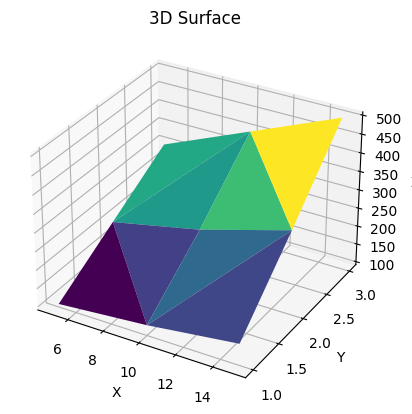

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the x, y, and z coordinates
x = [5, 5, 5, 10, 10, 10, 15, 15, 15]
y = [1, 2, 3, 1, 2, 3, 1, 2, 3]
z = [100, 200, 300, 120, 250, 400, 150, 320, 500]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface')

# Show the plot
plt.show()


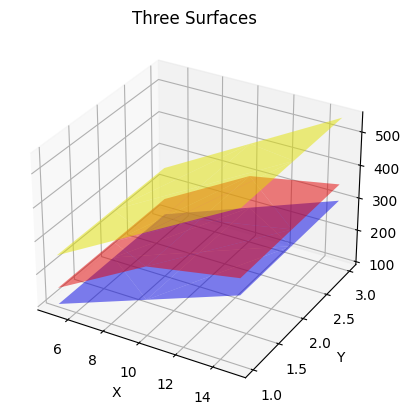

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the first surface coordinates
x1 = np.array([5, 5, 5, 10, 10, 10, 15, 15, 15])
y1 = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])
z1 = np.array([100, 100, 100, 200, 200, 200, 300, 300, 300])

# Define the second surface coordinates
x2 = np.array([5, 5, 5, 10, 10, 10, 15, 15, 15])
y2 = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])
z2 = np.array([150, 150, 150, 300, 300, 300, 350, 350, 350])

# Define the third surface coordinates
x3 = np.array([5, 5, 5, 10, 10, 10, 15, 15, 15])
y3 = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])
z3 = np.array([250, 250, 250, 400, 400, 400, 550, 550, 550])

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first surface
ax.plot_trisurf(x1, y1, z1, color='blue', alpha=0.5)

# Plot the second surface
ax.plot_trisurf(x2, y2, z2, color='red', alpha=0.5)

# Plot the third surface
ax.plot_trisurf(x3, y3, z3, color='yellow', alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Three Surfaces')

# Show the plot
plt.show()



In [43]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType, FloatType, StructType, StructField, IntegerType,  StringType, ArrayType
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


## start session
spark = SparkSession.builder.appName("SparkGraphics").getOrCreate()

df = spark.read.csv("/home/weber/Documents/df100K_core8_cpu2.csv", header=True)        

df.show(10)

+---+-----------------+-------+---+-----+----------+--------------------+-------------------------+--------------+-----------+
| id|           method|df_size|  k|   oq|qnt_pivots|select_pivots_method|time_select_pivots_method|execution_time|droped_rows|
+---+-----------------+-------+---+-----+----------+--------------------+-------------------------+--------------+-----------+
|  1|     bridk_simple| 100000|  5|39221|         2|              random|              1.244545E-4|     32.266094|          0|
|  2|bridk_incremental| 100000|  5|39221|         2|              random|              1.244545E-4|     15.220989|      51725|
|  3|        brute_knn| 100000|  5|39221|         2|              random|              1.244545E-4|   0.039719343|          0|
|  4|     bridk_simple| 100000| 10|39221|         2|              random|              1.244545E-4|     34.584473|          0|
|  5|bridk_incremental| 100000| 10|39221|         2|              random|              1.244545E-4|     19.3899

In [57]:

df = spark.read.csv("/home/weber/Documents/df100K_core8_cpu2.csv", header=True)        

# Agrupar por 'method' e 'k' e calcular a média de 'execution_time'
grouped_df = df.groupBy('method','select_pivots_method', 'k').agg(F.mean('execution_time').alias('mean_execution_time'))

grouped_df.show()

# Fazer o pivot da coluna 'k'
pivot_df = grouped_df.groupBy('method','select_pivots_method').pivot('k').agg(F.first('mean_execution_time'))

pivot_df.show()

+-----------------+--------------------+---+-------------------+
|           method|select_pivots_method|  k|mean_execution_time|
+-----------------+--------------------+---+-------------------+
|        brute_knn|              random| 10|0.08260709087500001|
|bridk_incremental|              random| 15| 22.873186124999997|
|        brute_knn|              random| 25|      0.09161317325|
|bridk_incremental|              random| 10| 21.638502250000002|
|     bridk_simple|              random| 15|       30.990629375|
|        brute_knn|              random| 20|     0.088976024875|
|     bridk_simple|              random| 10|          31.003755|
|     bridk_simple|              random|  5|         31.1686495|
|     bridk_simple|              random| 20|        31.02853075|
|        brute_knn|              random|  5|     0.084196180625|
|bridk_incremental|              random| 20|       24.857419625|
|     bridk_simple|              random| 25| 31.281180125000002|
|        brute_knn|      

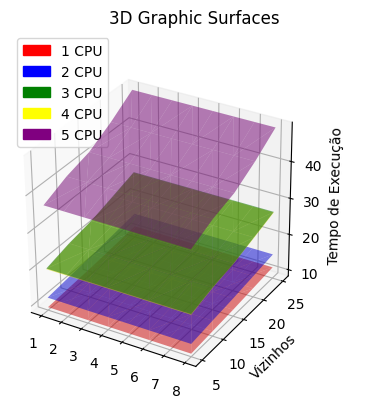

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

cpu=[1,2,3,4,5,6,7,8]
colors = ['red', 'blue', 'green', 'yellow', 'purple']#, 'orange', 'pink', 'brown']
x = []
z = []
y = []

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(cpu)-3):

    df = spark.read.csv(f"/home/weber/Documents/df100K_core8_cpu{i}.csv", header=True) 
    grouped_df = df.groupBy('method','select_pivots_method', 'k').agg(F.mean('execution_time').alias('mean_execution_time'))
    df_collect = grouped_df.collect()
    values = []
    for row in df_collect:
        if row.method == 'bridk_incremental':
            values.append([row.k, row.mean_execution_time])

    sorted_list = sorted(values, key=lambda x: int(x[0]))
    values_mean = [element[1] for element in sorted_list]

    # Define the third surface coordinates
    for k in [5,10,15,20,25]:
        for l in range(8):
            y.append(k)

    x = [1, 2, 3, 4, 5, 6, 7, 8]*5

    for k in values_mean:
        for l in range(8):
            z.append(k)


    # Plot the first surface
    ax.plot_trisurf(x, y, z, color=colors[i], alpha=0.5)

    x = []
    y = []
    z = []


# Set labels and title
#ax.set_xlabel('CPUs')
ax.set_ylabel('Vizinhos')
ax.set_zlabel('Tempo de Execução')
ax.set_title('3D Graphic Surfaces')

# Adjust subplot parameters to increase space around the plot
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 2, 2.5, 2.5]))

# Create custom legend handles with colors
legend_handles = [mpatches.Patch(color=color, label=f'{j+1} CPU') for j, color in enumerate(colors)]

# Add a color legend
ax.legend(handles=legend_handles, loc='upper left')

# Show the plot
plt.show()

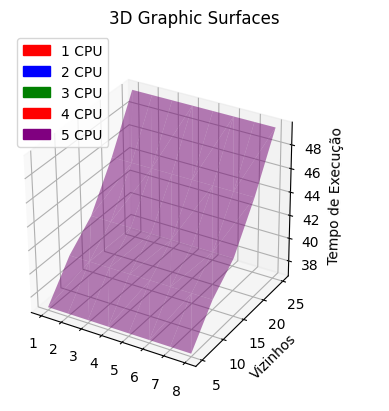

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

cpu=[1,2,3,4,5,6,7,8]
colors = ['red', 'blue', 'green', 'red', 'purple']#, 'orange', 'pink', 'brown']
x = []
z = []
y = []

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



df = spark.read.csv(f"/home/weber/Documents/df100K_core8_cpu{4}.csv", header=True) 
grouped_df = df.groupBy('method','select_pivots_method', 'k').agg(F.mean('execution_time').alias('mean_execution_time'))
df_collect = grouped_df.collect()
values = []
for row in df_collect:
    if row.method == 'bridk_incremental':
        values.append([row.k, row.mean_execution_time])

sorted_list = sorted(values, key=lambda x: int(x[0]))
values_mean = [element[1] for element in sorted_list]

# Define the third surface coordinates
for k in [5,10,15,20,25]:
    for l in range(8):
        y.append(k)

x = [1, 2, 3, 4, 5, 6, 7, 8]*5

for k in values_mean:
    for l in range(8):
        z.append(k)


# Plot the first surface
ax.plot_trisurf(x, y, z, color=colors[i], alpha=0.5)

x = []
y = []
z = []


# Set labels and title
#ax.set_xlabel('CPUs')
ax.set_ylabel('Vizinhos')
ax.set_zlabel('Tempo de Execução')
ax.set_title('3D Graphic Surfaces')

# Adjust subplot parameters to increase space around the plot
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 2, 2.5, 2.5]))

# Create custom legend handles with colors
legend_handles = [mpatches.Patch(color=color, label=f'{j+1} CPU') for j, color in enumerate(colors)]

# Add a color legend
ax.legend(handles=legend_handles, loc='upper left')

# Show the plot
plt.show()

/tmp/ipykernel_335607/1346214158.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x, y, z, c=colors, cmap='viridis')


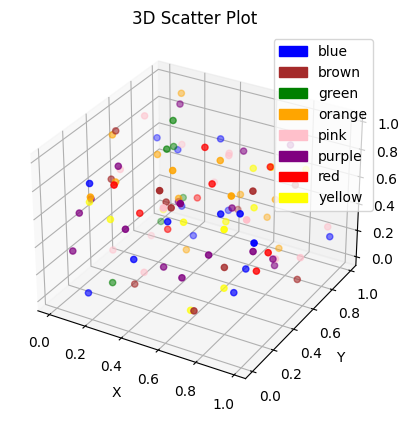

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Generate some random data
np.random.seed(42)
n_points = 100
x = np.random.rand(n_points)
y = np.random.rand(n_points)
z = np.random.rand(n_points)
colors = np.random.choice(['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown'], size=n_points)

# Create the figure and the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter plot
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Create custom legend handles with colors
unique_colors = np.unique(colors)
legend_handles = [mpatches.Patch(color=color, label=color) for color in unique_colors]

# Add a color legend
ax.legend(handles=legend_handles, loc='upper right')

# Show the plot
plt.show()
